<a href="https://colab.research.google.com/github/Sandramcrs08/-Teste_de_Hip-teses/blob/main/Teste_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Teste de Hipóteses

## Squad Marie Curie

In [ ]:
##Bibliotecas utilizadas
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### Para visualizaçaõ dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#O módulo stats da biblioteca Scipy contém uma ampla variedade de funções e classes relacionadas a estatísticas e distribuições de probabilidade.
from scipy import stats

#importando a função f_oneway para realizar um teste de análise de variância (ANOVA)
from scipy.stats import f_oneway

In [ ]:
# lendo os arquivos csv
df = pd.read_csv('desafio_01_cosmeticos.csv')

### Desafio 1 : Cosméticos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.
Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes: <br> <br>
● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3<br>
● id_voluntária: código identificador da voluntária que utilizou o produto.<br>
● durabilidade: quanto tempo o produto durou em horas.<br>
● idade: idade da voluntária<br>
● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.<br><br>


In [ ]:
#Visualização do dataframe
df

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol,faixa_etaria
0,1,1,12,40,1,31-40
1,2,2,5,36,0,31-40
2,1,3,19,47,0,41-50
3,1,4,14,36,1,31-40
4,1,5,17,46,1,41-50
...,...,...,...,...,...,...
295,3,296,18,52,0,51-60
296,3,297,30,19,0,0-20
297,3,298,43,23,1,21-30
298,3,299,41,19,0,0-20


De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

In [ ]:
# solução da questão 1
# Barbara
#Filtro que retorna os valores da coluna durabilidade para cada tipo de batom.
batom_1 = df[df['id_produto'] == 1]['durabilidade']
batom_2 = df[df['id_produto'] == 2]['durabilidade']
batom_3 = df[df['id_produto'] == 1]['durabilidade']

# Utilizando o teste ANOVA para verificar se há diferenças significativas nas médias entre as três amostras
anova_test = f_oneway(batom_1,batom_2,batom_3)
print(f'A estatística F é: {anova_test.statistic}. O p_valor é: {anova_test.pvalue}.')

# Definindo o nível de significância para o teste.
alfa = 0.05

# Verificar se há diferença estatisticamento significativa na durabilidade entre as três fórmulas de batons
if anova_test.pvalue > alfa:
  print('A hipótese H0 não pode ser rejeitada.')
else:
  print('A hipótese H1 pode ser rejetada.')



A estatística F é: 212.5575122843515. O p_valor é: 5.026724927782344e-58.
A hipótese H1 pode ser rejetada.


2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

In [ ]:
# solução da questão 2
# Juliana

# Dividindo os dados por fórmula (id_produto) para análise
formulas = df['id_produto'].unique()

# Listas para armazenar resultados dos testes
results = []

# Comparando a durabilidade entre as diferentes fórmulas
for formula in formulas:
    durabilidade_formula = df[df['id_produto'] == formula]['durabilidade']
    mean_durabilidade = durabilidade_formula.mean()
    std_durabilidade = durabilidade_formula.std()
    results.append({'id_produto': formula, 'media_durabilidade': mean_durabilidade, 'desvio_padrao_durabilidade': std_durabilidade})

# DataFrame com os resultados
df_results = pd.DataFrame(results)
print("\nComparação de Durabilidade por Fórmula:")
print(df_results)


Comparação de Durabilidade por Fórmula:
   id_produto  media_durabilidade  desvio_padrao_durabilidade
0           1               15.11                    3.284168
1           2                7.77                    1.942897
2           3               28.52                   11.110537


In [ ]:

# Teste de Anova para verificar diferenças na durabilidade entre as fórmulas
f_statistic, p_value = stats.f_oneway(df[df['id_produto'] == 1]['durabilidade'],
                                      df[df['id_produto'] == 2]['durabilidade'],
                                      df[df['id_produto'] == 3]['durabilidade'])

alpha = 0.05
print("\nTeste de Anova (Diferença entre as Fórmulas):")
print("Estatística F:", f_statistic)
print("Valor p:", p_value)

if p_value < alpha:
    print("Existe diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.")
else:
    print("Não há diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.")



Teste de Anova (Diferença entre as Fórmulas):
Estatística F: 240.6680561187368
Valor p: 7.345246616757137e-63
Existe diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.


In [ ]:
# Análise considerando a exposição ao sol
exposta_durabilidade = df[df['exposicao_sol'] == 1]['durabilidade']
nao_exposta_durabilidade = df[df['exposicao_sol'] == 0]['durabilidade']

t_statistic, p_value_sol = stats.ttest_ind(exposta_durabilidade, nao_exposta_durabilidade)

print("\nTeste t (Diferença de Durabilidade com Exposição ao Sol):")
print("Estatística t:", t_statistic)
print("Valor p:", p_value_sol)

if p_value_sol < alpha:
    print("Existe diferença estatisticamente significativa na durabilidade considerando a exposição ao sol.")
else:
    print("Não há diferença estatisticamente significativa na durabilidade considerando a exposição ao sol.")



Teste t (Diferença de Durabilidade com Exposição ao Sol):
Estatística t: -6.569037741942654
Valor p: 2.2536816589784333e-10
Existe diferença estatisticamente significativa na durabilidade considerando a exposição ao sol.


In [ ]:
# Análise considerando a idade
jovens_durabilidade = df[df['idade'] < 30]['durabilidade']
adultos_durabilidade = df[df['idade'] >= 30]['durabilidade']

t_statistic, p_value_idade = stats.ttest_ind(jovens_durabilidade, adultos_durabilidade)

print("\nTeste t (Diferença de Durabilidade com Relação à Idade):")
print("Estatística t:", t_statistic)
print("Valor p:", p_value_idade)

if p_value_idade < alpha:
    print("Existe diferença estatisticamente significativa na durabilidade considerando a idade das voluntárias.")
else:
    print("Não há diferença estatisticamente significativa na durabilidade considerando a idade das voluntárias.")


Teste t (Diferença de Durabilidade com Relação à Idade):
Estatística t: 8.311725045129682
Valor p: 3.381876992708049e-15
Existe diferença estatisticamente significativa na durabilidade considerando a idade das voluntárias.


3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

In [ ]:
# solução da questão 3
# Grazielle

In [ ]:
# Vamos criar faixas etárias para facilitar a visualização
df['faixa_etaria'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+'])

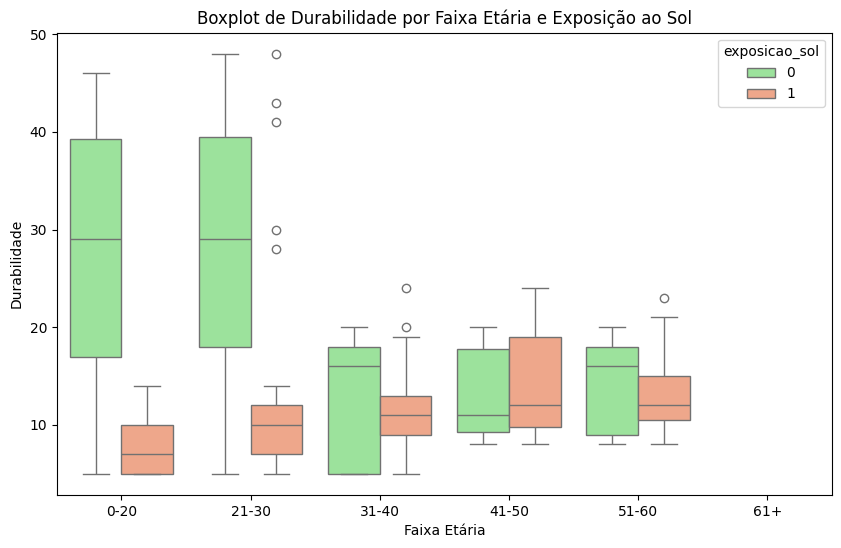

In [ ]:
# Vamos plotar o boxplot para entendermos visualmente
plt.figure(figsize=(10, 6))
sns.boxplot(x='faixa_etaria', y='durabilidade', hue='exposicao_sol', data=df, palette={0: 'lightgreen', 1: 'lightsalmon'})
plt.title('Boxplot de Durabilidade por Faixa Etária e Exposição ao Sol')
plt.xlabel('Faixa Etária')
plt.ylabel('Durabilidade')
plt.show()

Medianas da Durabilidade para cada Fórmula e Exposição ao Sol:
exposicao_sol     0     1
id_produto               
1              18.0  12.0
2               8.0   7.0
3              33.0  19.0


<Figure size 1000x600 with 0 Axes>

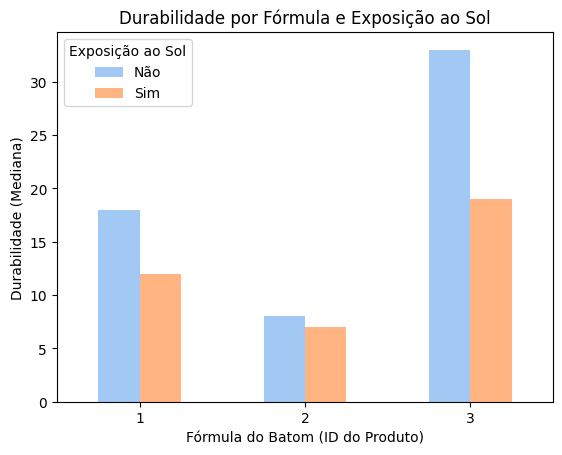

In [ ]:
# Calcular a mediana da durabilidade para cada fórmula em diferentes níveis de exposição ao sol
median_durability_by_formula = df.groupby(['id_produto', 'exposicao_sol'])['durabilidade'].median().unstack()

# Visualizar as medianas da durabilidade
print("Medianas da Durabilidade para cada Fórmula e Exposição ao Sol:")
print(median_durability_by_formula)

# Definir uma paleta de cores
colors = sns.color_palette("pastel", n_colors=len(median_durability_by_formula.columns))

# Plotar um gráfico para visualizar as medianas da durabilidade
plt.figure(figsize=(10, 6))
median_durability_by_formula.plot(kind='bar', color=colors)
plt.title('Durabilidade por Fórmula e Exposição ao Sol')
plt.xlabel('Fórmula do Batom (ID do Produto)')
plt.ylabel('Durabilidade (Mediana)')
plt.xticks(rotation=0)
plt.legend(title='Exposição ao Sol', labels=['Não', 'Sim'])
plt.show()


**Indicamos a fórmula 3 , posi ela é a que oferece a maior relação entre durabilidade a exposição ao sol.**

Mateiral de Apoio:
https://medium.com/rodrigo-lampier/usando-teste-de-hip%C3%B3teses-para-responder-quest%C3%B5es-de-neg%C3%B3cio-8a3d5ae9ebc0

### Desafio 2 :



Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de
determinado produto, um novo picolé, tem uma distribuição normal com média igual a `R$7,85` e desvio padrão igual a `R$3,32`. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.
Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.<br>
Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de `R$11,52`.


1. Voce pode concluir que existe diferenca de precos estatisticamente
relevante com `5%` de significancia?


In [ ]:
# solução da questão 1
# Leli e Maria Alice

from scipy.stats import t

# Dados
media_hipotetica = 7.85  # Preço médio hipotético do picolé (R$)
desvio_padrao = 3.32  # Desvio padrão do preço do picolé (R$)
media_amostral = 11.52  # Preço médio amostral do picolé nas cidades do litoral (R$)
n = 45  # Tamanho da amostra
significancia = 0.05  # Nível de significância

# Calculando a estatística do teste t
t_valor = (media_amostral - media_hipotetica) / (desvio_padrao / (n ** 0.5))

# Calculando o valor crítico de t para um teste bilateral
graus_de_liberdade = n - 1
t_critico_esquerda = t.ppf(significancia / 2, graus_de_liberdade)
t_critico_direita = t.ppf(1 - (significancia / 2), graus_de_liberdade)

# Imprimindo os resultados
print("Valor do t calculado:", t_valor)
print("Valor crítico de t (esquerda):", t_critico_esquerda)
print("Valor crítico de t (direita):", t_critico_direita)

# Tomando a decisão
if t_valor < t_critico_esquerda or t_valor > t_critico_direita:
    print("Rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente relevante nos preços dos picolés.")
else:
    print("Não rejeitamos a hipótese nula.")
    print("Não há uma diferença estatisticamente relevante nos preços dos picolés.")

Valor do t calculado: 7.415394106106231
Valor crítico de t (esquerda): -2.0153675699129416
Valor crítico de t (direita): 2.015367569912941
Rejeitamos a hipótese nula.
Há uma diferença estatisticamente relevante nos preços dos picolés.


2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
# solução da questão 2
# Sandra e Carla Maria

In [ ]:
media_geral = 7.85
d_padrao = 3.32
n = 45
preco_medio_cidades_litoral = 11.52
alpha = 0.05

# valor da variável teste
z_score = (preco_medio_cidades_litoral - media_geral) / (d_padrao / np.sqrt(n))
print("Valor da variável teste:", z_score)


# intervalo de confiança
z = stats.norm.ppf(1 - (0.05 / 2))

intervalo_de_confianca = z * (d_padrao / np.sqrt(n))

limite_infe = preco_medio_cidades_litoral - intervalo_de_confianca
limite_supe = preco_medio_cidades_litoral + intervalo_de_confianca

print('Intervalo de confiança é:', (limite_infe, limite_supe))

# p-value
p_value = 1 - stats.norm.cdf(z_score)
print("p_value é:", p_value)


Valor da variável teste: 7.415394106106231
Intervalo de confiança é: (10.549981721761917, 12.490018278238082)
p_value é: 6.061817714453355e-14
